In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats
import numpy as np
import networkx as nx
from itertools import count
import matplotlib.cm as cm
import time
import seaborn as sns


# Lectura de Datos

In [2]:
datos = pd.read_excel('Base de datos/Base de datos Chiloe Full.xlsx').reset_index()
datos = datos.rename({'index':'Id'}, axis='columns')

### Descripciones de los campos


1. Id: El ID es un identificador único asignado a cada review de la base de datos. 
2. placeId: El placeId es un identificador único asignado a cada lugar en Google Maps.
3. user name:  El nombre de usuario es el nombre del autor de la reseña en Google Maps. 
4. text: Es el texto escrito por el autor de la reseña para compartir su experiencia o comentarios sobre el lugar.
5. textTranslated: El campo textTranslated contiene la versión traducida al inglés del texto de la reseña.
6. publishedAtDate: Representa la fecha en la que se publicó la reseña en Google Maps.
8. likesCount: Indica la cantidad de "me gusta" o votos positivos recibidos por la reseña.
9. reviewId: reviewId es un identificador único asignado a cada reseña en Google Maps
10. reviewerId: Es el ID del revisor o autor de la reseña en Google Maps. 
11. stars:  Indica la valoración general del lugar en una escala de estrellas, donde 1 es la calificación más baja y 5 es la más  alta.
12. responseFromOwnerDate: Si el propietario o administrador del lugar ha respondido a una reseña, el campo responseFromOwnerDate mostrará la fecha en que se realizó la respuesta.
13. responseFromOwnerText:  Si el propietario o administrador del lugar ha respondido a una reseña, el campo responseFromOwnerText contendrá el texto de la respuesta proporcionada.
lugar. El campo reviewDetailedRating puede contener esta información adicional.
14. hotelStars: Representa la clasificación de estrellas de un hotel específico
15. query: Se refiere a la consulta o búsqueda realizada para obtener las reseñas de Google Maps.
16. place name: Nombre del establecimiento o ubicación para la cual se ha dejado la reseña en Google Maps
17. type:  El campo type indica el tipo general de lugar al que pertenece el establecimiento. Puede ser una categoría amplia como restaurante, hotel, tienda, etc.
18. subtypes: Los subtipos (subtypes) son categorías más específicas que proporcionan información adicional sobre el tipo de lugar. Por ejemplo, si el tipo es restaurante, los subtipos pueden ser italiano, mexicano, sushi, etc. Puede incluir categorías como comida rápida, lujo, económico, spa, etc.
19. city: Indica la ciudad en la que se encuentra el lugar para el cual se ha dejado la reseña en Google Maps.
20. latitude: Representa la coordenada geográfica que indica la ubicación del lugar en el eje vertical. 
21. longitude: Representa la coordenada geográfica que indica la ubicación del lugar en el eje horizontal.
22. rating: Calificación promedio o puntuación general del lugar basada en las reseñas.
23. reviews: El campo reviews se refiere a la cantidad total de reseñas disponibles para el lugar. 



# Análisis de datos

## 1. Descripción base de datos

In [3]:
print('Cantidad de Reviews: '+str(len(datos)))
print('Cantidad de Comentarios: ' + str(len(datos['text'].dropna())))
print('Cantidad de Lugares: '+ str(len(datos['placeId'].unique())))
print('Cantidad de usuarios únicos: '+str(len(datos['reviewerId'].unique())))

Cantidad de Reviews: 701964
Cantidad de Comentarios: 344197
Cantidad de Lugares: 2638
Cantidad de usuarios únicos: 262467


**En esta base de datos, se encuentran un total de 278.316 registros de reseñas. Estos registros incluyen 138.784 usuarios únicos, 134.914 comentarios y abarcan 906 lugares únicos.**

<Axes: xlabel='Year'>

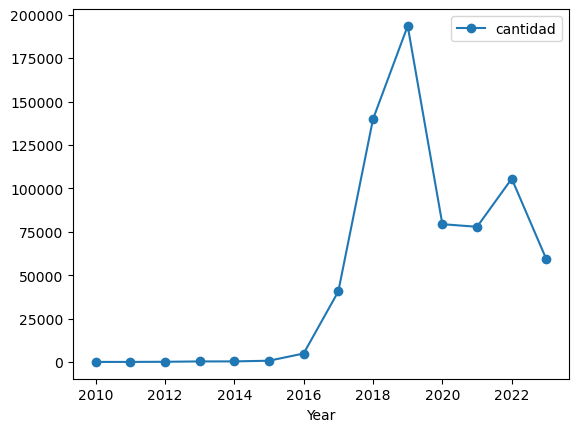

In [4]:
datos['publishedAtDate'] = pd.to_datetime(datos['publishedAtDate'])
datos['Year'] = datos['publishedAtDate'].dt.strftime('%Y')

datos.groupby('Year').agg(cantidad=('Id','count')).plot(style='o-')

**La figura anterior muestra la cantidad de registros de reviews por año**

## 2. Análisis por categoría

In [5]:
def categoria(palabra):
    return palabra.split(',')[0]

datos['Categoria query'] = datos['query'].apply(categoria)
datos.loc[datos['Categoria query'] == 'Restaurante', 'Categoria query'] = 'restaurant'

datos.head()

,Id,placeId,user name,text,textTranslated,publishedAtDate,likesCount,reviewId,reviewerId,stars,...,place name,type,subtypes,city,latitude,longitude,rating,reviews,Year,Categoria query
0,0,ChIJA7e1akBiF5YRGX2D8me8Pnw,Paola Delgado,NaN,NaN,2023-04-13 10:32:43.567000+00:00,0,ChZDSUhNMG9nS0VJQ0FnSUNSajRHV1dnEAE,111671823337824415446,5.0,...,Petrohué Waterfalls,Tourist attraction,"Tourist attraction, Park",Puerto Varas,-41.173274,-72.449371,4.8,19889,2023,tourist attraction
1,1,ChIJA7e1akBiF5YRGX2D8me8Pnw,Raúl Espinoza,NaN,NaN,2023-04-12 20:35:11.226000+00:00,0,ChZDSUhNMG9nS0VJQ0FnSUNSMTllaVFREAE,110440908606240254978,4.0,...,Petrohué Waterfalls,Tourist attraction,"Tourist attraction, Park",Puerto Varas,-41.173274,-72.449371,4.8,19889,2023,tourist attraction
2,2,ChIJA7e1akBiF5YRGX2D8me8Pnw,David Fuentes,"Hermoso atractivo turistico, cuanta con sender...","Beautiful tourist attraction, how much with sa...",2023-04-12 16:40:27.409000+00:00,1,ChdDSUhNMG9nS0VJQ0FnSUNSbDZYbm1BRRAB,110482147019645163894,5.0,...,Petrohué Waterfalls,Tourist attraction,"Tourist attraction, Park",Puerto Varas,-41.173274,-72.449371,4.8,19889,2023,tourist attraction
3,3,ChIJA7e1akBiF5YRGX2D8me8Pnw,Juan José Porras,NaN,NaN,2023-04-12 16:04:27.598000+00:00,0,ChZDSUhNMG9nS0VJQ0FnSUNSbF82aERBEAE,113056497391602774888,5.0,...,Petrohué Waterfalls,Tourist attraction,"Tourist attraction, Park",Puerto Varas,-41.173274,-72.449371,4.8,19889,2023,tourist attraction
4,4,ChIJA7e1akBiF5YRGX2D8me8Pnw,Fernanda Escudero Gajardo,"Muy lindo parque nacional, 100% recomendado, m...","Very nice national park, 100% recommended, ver...",2023-04-12 15:27:01.997000+00:00,0,ChdDSUhNMG9nS0VJQ0FnSUNSbDdLQmhBRRAB,106829746289981324011,5.0,...,Petrohué Waterfalls,Tourist attraction,"Tourist attraction, Park",Puerto Varas,-41.173274,-72.449371,4.8,19889,2023,tourist attraction


#### 2.1. Cantidad de lugares por categoria

,cantidad
count,32.000000
mean,82.781250
std,156.910234
min,1.000000
25%,15.000000
50%,27.500000
75%,56.500000
max,632.000000


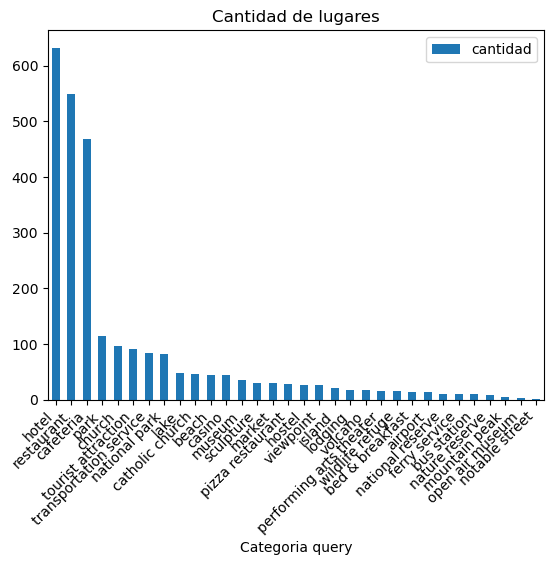

In [6]:
datos[['Categoria query','placeId']].drop_duplicates().groupby(['Categoria query']).agg(cantidad=('placeId','count')).sort_values(by='cantidad',ascending=False).plot(kind='bar',)
plt.xticks(rotation = 45,horizontalalignment='right') 
plt.title('Cantidad de lugares')

datos[['Categoria query','placeId']].drop_duplicates().groupby(['Categoria query']).agg(cantidad=('placeId','count')).describe()

#### 2.2. Cantidad de reviews por categoria¶

,cantidad
count,32.000000
mean,21936.375000
std,33541.205784
min,147.000000
25%,2646.250000
50%,9974.000000
75%,23610.750000
max,132457.000000


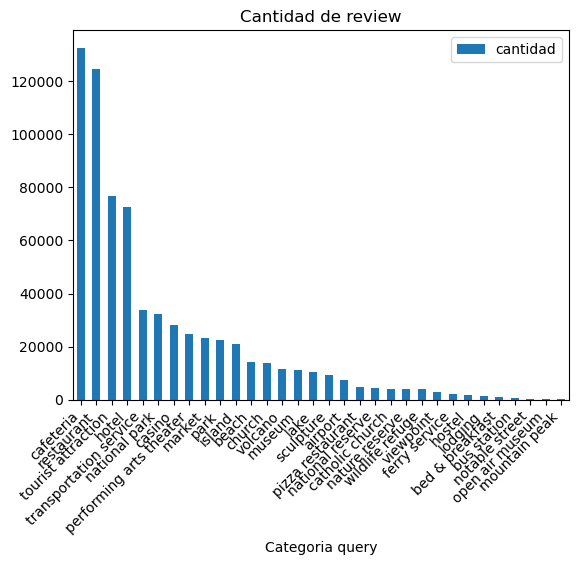

In [7]:
datos.groupby(['Categoria query']).agg(cantidad=('reviewId','count')).sort_values(by='cantidad',ascending=False).plot(kind='bar',)
plt.xticks(rotation = 45,horizontalalignment='right') 
plt.title('Cantidad de review')
datos.groupby(['Categoria query']).agg(cantidad=('reviewId','count')).describe()

**Plot A Filtrar desde 2016**

In [8]:
datos['Year']=datos['Year'].astype(int)
datos1=datos[datos['Year']>2015]

In [9]:
categ = datos1.groupby(['Categoria query']).agg(cantidad=('reviewId','count')).sort_values(by='cantidad',ascending=False)[0:10].index
categ_datos = datos1[datos1['Categoria query'].isin(categ)]
cantidad = categ_datos.groupby(['Categoria query','Year']).agg(cantidad=('Id','count')).reset_index(level=['Categoria query','Year'])
cantidad 

,Categoria query,Year,cantidad
0,cafeteria,2016,702
1,cafeteria,2017,6971
2,cafeteria,2018,23583
3,cafeteria,2019,37571
4,cafeteria,2020,13617
...,...,...,...
75,transportation service,2019,7626
76,transportation service,2020,3862
77,transportation service,2021,5224
78,transportation service,2022,5836


C:\Users\cmurua\AppData\Local\Temp\ipykernel_17708\3860802709.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Set1', len(cantidad['Categoria query'].unique()))
C:\Users\cmurua\AppData\Local\Temp\ipykernel_17708\3860802709.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', len(cantidad['Categoria query'].unique()))
C:\Users\cmurua\AppData\Local\Temp\ipykernel_17708\3860802709.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *

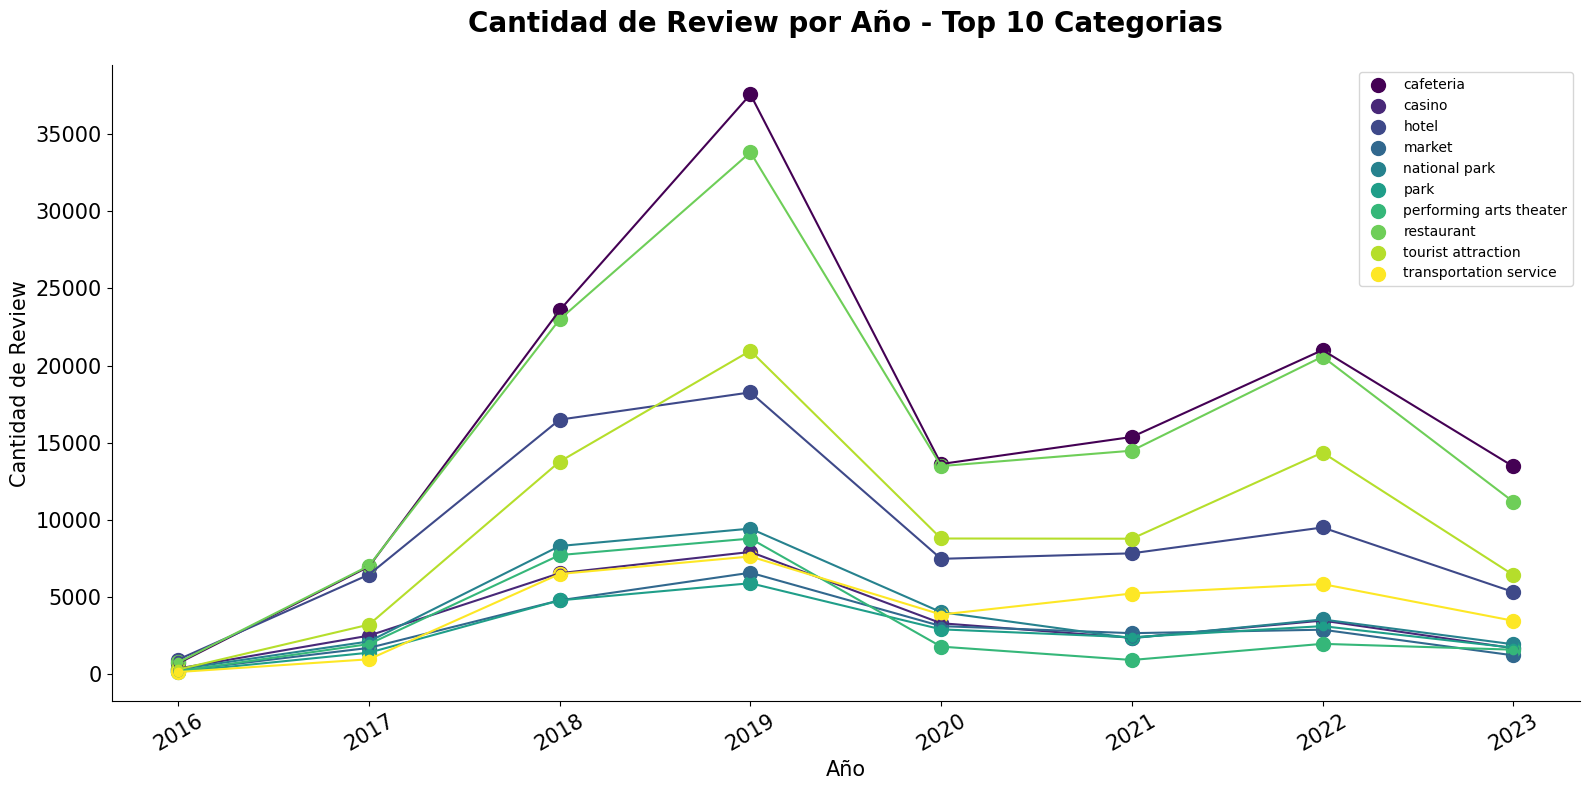

In [10]:
def hide_border(ax):
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Define a color map for categories
color_map = plt.cm.get_cmap('Set1', len(cantidad['Categoria query'].unique()))

color_map = cm.get_cmap('viridis', len(cantidad['Categoria query'].unique()))

# Iterate over each unique category and plot the data points
for i, category in enumerate(cantidad['Categoria query'].unique()):
    category_data = cantidad[cantidad['Categoria query'] == category]
    ax.scatter(category_data['Year'], category_data['cantidad'],  c=color_map(i), label=category, s=100)
    ax.plot(category_data['Year'], category_data['cantidad'], '-o', c=color_map(i))


ax.set_xlabel("Año", fontsize=15)
ax.set_ylabel("Cantidad de Review", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=30, fontsize=15)
plt.yticks(fontsize=15)
ax.set_title("Cantidad de Review por Año - Top 10 Categorias", pad=24, fontweight=700, fontsize=20)
hide_border(ax)
ax.legend()  # Show the legend with category labels
fig.tight_layout()

**La figura anterior muestra la cantidad de reviews por año que han tenido las 10 categorías con más reviews**

#### 2.3 Cantidad de comentarios por categoría


,cantidad
count,32.000000
mean,10756.156250
std,17484.304355
min,84.000000
25%,1459.250000
50%,4706.000000
75%,9740.500000
max,67681.000000


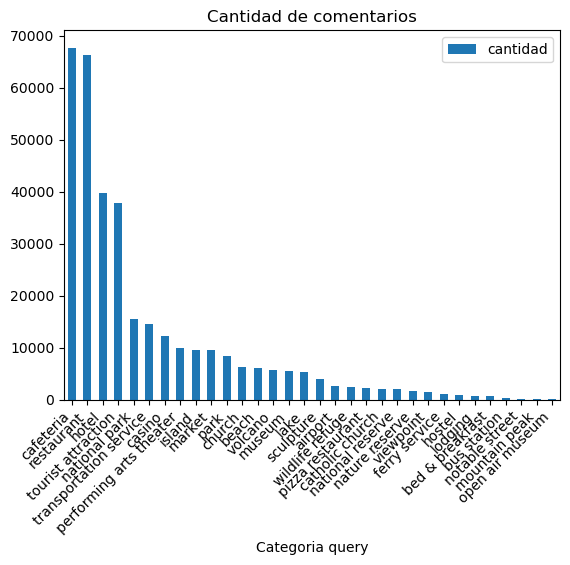

In [11]:
datos.groupby(['Categoria query']).agg(cantidad=('text','count')).sort_values(by='cantidad',ascending=False).plot(kind='bar',)
plt.xticks(rotation = 45,horizontalalignment='right') 
plt.title('Cantidad de comentarios')
datos.groupby(['Categoria query']).agg(cantidad=('text','count')).describe()

## 3. Análisis por lugar

#### 3.1. Cantidad de review por lugar

,cantidad
count,2638.000000
mean,266.097043
std,915.968281
min,10.000000
25%,25.000000
50%,64.000000
75%,179.000000
max,21433.000000


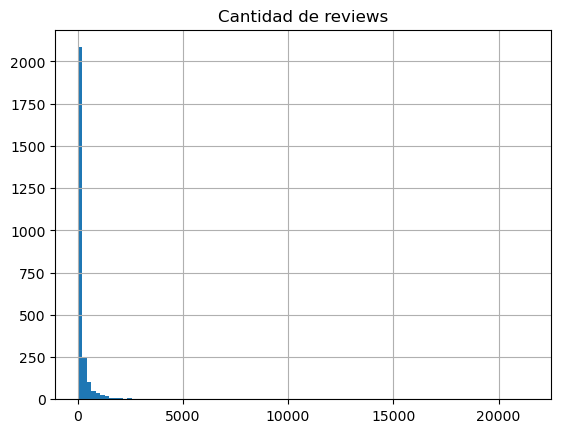

In [12]:
datos.groupby(['placeId','place name']).agg(cantidad=('reviewId','count')).sort_values(by='cantidad',ascending=False).hist(bins=100)
plt.title('Cantidad de reviews')
datos.groupby(['placeId','place name']).agg(cantidad=('reviewId','count')).describe()

**Plot B continuación se realizará un un gráfico de barra del top 20 de lugares con mayor cantidad de reviews.**

In [13]:
datos2=datos.groupby(['placeId','place name']).agg(cantidad=('reviewId','count')).sort_values(by='cantidad',ascending=False)[0:20].reset_index('placeId',drop=True)
datos2=datos2.reset_index('place name')
datos2

,place name,cantidad
0,Terminal de Buses Municipal de Puerto Montt,21433
1,Petrohué Waterfalls,19896
2,Teatro del Lago,13211
3,Muelle de Frutillar,12020
4,Plaza de Armas de Puerto Montt,8733
5,Mesa Tropera,7790
6,Plaza de Armas de Osorno,7787
7,Volcán Osorno Centro de Ski y Montaña,7542
8,Fuerte San Antonio,6253
9,"Iglesia de San Francisco, Castro",6158


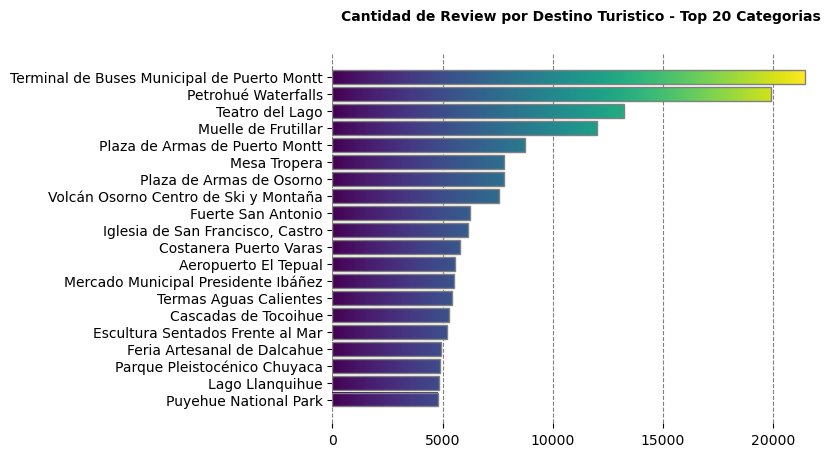

In [14]:
def gradientbars(bars, xdata, cmap):
    ax = bars[0].axes
    lim = ax.get_xlim() + ax.get_ylim()
    ax.axis(lim)
    for bar in bars:
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0, 1 * w / max(xdata), 256))
        # zorder of 2 to get gradients above the facecolor, but below the bar outlines
        ax.imshow(grad, extent=[x, x + w, y, y + h], origin='lower', aspect="auto", zorder=2,
                  norm=cm.colors.NoNorm(vmin=0, vmax=1), cmap=plt.get_cmap(cmap))

fig, ax = plt.subplots()
# zorder=0 sends gridlines to the back
ax.grid(which='major', axis='x', linestyle='--', color='gray', zorder=0)
# zorder=3 makes our edges show
my_bar = ax.barh(datos2['place name'][::-1], datos2['cantidad'][::-1], edgecolor='gray', zorder=3)
gradientbars(my_bar, datos2['cantidad'][::-1], 'viridis')
plt.yticks(rotation=0)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Cantidad de Review por Destino Turistico - Top 20 Categorias",
             pad=24, fontweight=700, fontsize=10)
plt.show()

#### 3.2 Cantidad de comentarios por lugar

,cantidad
count,2638.000000
mean,130.476497
std,423.350348
min,0.000000
25%,13.000000
50%,34.000000
75%,96.750000
max,10263.000000


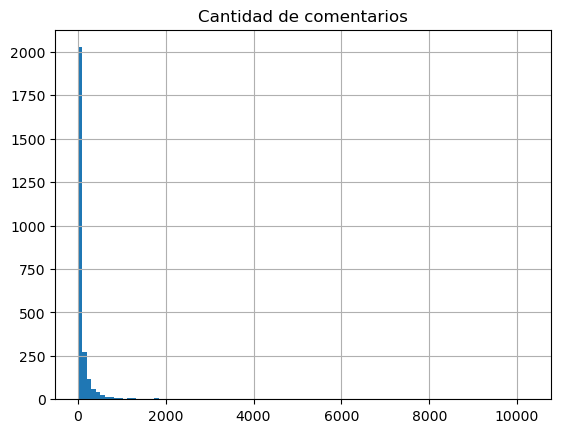

In [15]:
datos.groupby(['placeId','place name']).agg(cantidad=('text','count')).sort_values(by='cantidad',ascending=False).hist(bins=100)
plt.title('Cantidad de comentarios')
datos.groupby(['placeId','place name']).agg(cantidad=('text','count')).describe()

**A continuación se realizará un un gráfico de barra del top 20 de lugares con mayor cantidad de comentarios.**

Text(0.5, 1.0, 'Cantidad de comentarios')

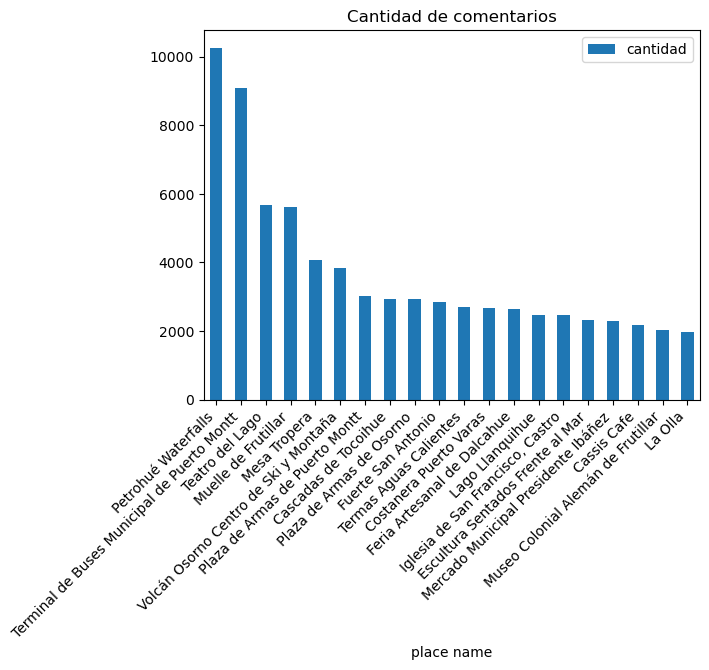

In [16]:
datos2=datos.groupby(['placeId','place name']).agg(cantidad=('text','count')).sort_values(by='cantidad',ascending=False)[0:20].reset_index('placeId',drop=True).plot(kind='bar',)
plt.xticks(rotation = 45,horizontalalignment='right') 
plt.title('Cantidad de comentarios')

In [17]:
datos2=datos.groupby(['placeId','place name']).agg(cantidad=('text','count')).sort_values(by='cantidad',ascending=False)[0:20].reset_index('placeId',drop=True)
datos2=datos2.reset_index('place name')
datos2

,place name,cantidad
0,Petrohué Waterfalls,10263
1,Terminal de Buses Municipal de Puerto Montt,9091
2,Teatro del Lago,5663
3,Muelle de Frutillar,5610
4,Mesa Tropera,4069
5,Volcán Osorno Centro de Ski y Montaña,3827
6,Plaza de Armas de Puerto Montt,3016
7,Cascadas de Tocoihue,2938
8,Plaza de Armas de Osorno,2929
9,Fuerte San Antonio,2853


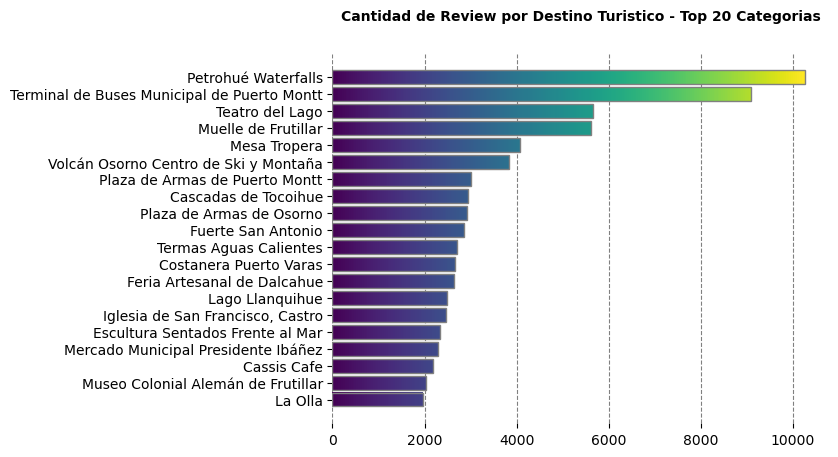

In [18]:
def gradientbars(bars, xdata, cmap):
    ax = bars[0].axes
    lim = ax.get_xlim() + ax.get_ylim()
    ax.axis(lim)
    for bar in bars:
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0, 1 * w / max(xdata), 256))
        # zorder of 2 to get gradients above the facecolor, but below the bar outlines
        ax.imshow(grad, extent=[x, x + w, y, y + h], origin='lower', aspect="auto", zorder=2,
                  norm=cm.colors.NoNorm(vmin=0, vmax=1), cmap=plt.get_cmap(cmap))

fig, ax = plt.subplots()
# zorder=0 sends gridlines to the back
ax.grid(which='major', axis='x', linestyle='--', color='gray', zorder=0)
# zorder=3 makes our edges show
my_bar = ax.barh(datos2['place name'][::-1], datos2['cantidad'][::-1], edgecolor='gray', zorder=3)
gradientbars(my_bar, datos2['cantidad'][::-1], 'viridis')
plt.yticks(rotation=0)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Cantidad de Review por Destino Turistico - Top 20 Categorias",
             pad=24, fontweight=700, fontsize=10)
plt.show()

## 4. Análisis por usuario

#### 4.1. Cantidad de comentarios por usuario

**En este análisis no se tiene el id de 66 registros de 210735.**

,cantidad
count,262466.000000
mean,1.310977
std,2.719596
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,101.000000


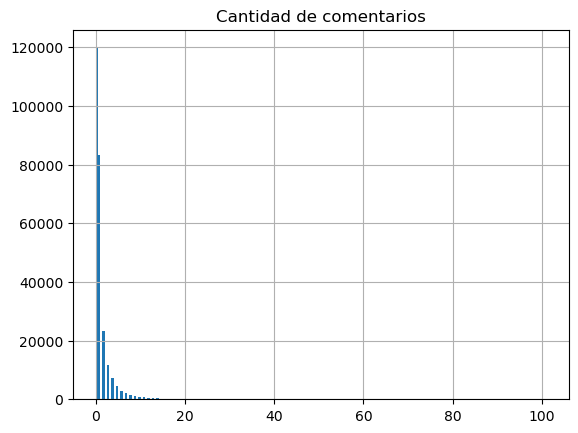

In [19]:
a = datos.groupby(['reviewerId']).agg(cantidad=('text','count')).sort_values(by='cantidad',ascending=False)
a.hist(bins=200)
plt.title('Cantidad de comentarios')


a.describe()

#### 4.2. Cantidad de reviews por usuario

,cantidad
count,262466.000000
mean,2.674076
std,3.743851
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,110.000000


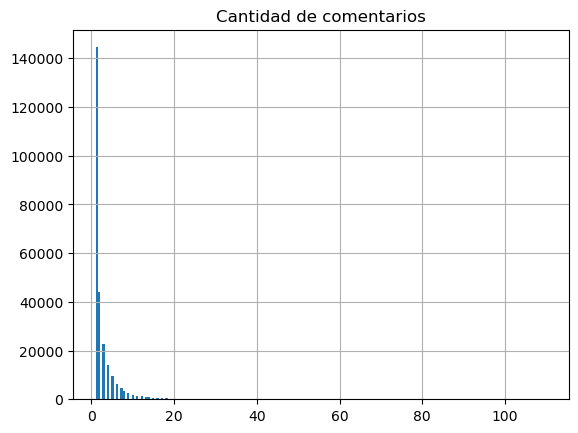

In [20]:
a = datos.groupby(['reviewerId']).agg(cantidad=('reviewId','count')).sort_values(by='cantidad',ascending=False)
a.hist(bins=200)
plt.title('Cantidad de comentarios')


a.describe()